# DAML BSU Course 2025 Final Project

## Specification

### Problem statement
Are there any metrics I can use or derive that can describe patterns of citation use in UG literature reviews?
Initial answer: poorer work uses citations that are less tightly-bound to one another and more likely to be outside of the genre.

## Extract, Transform, Load version1
1. identify two training documents
2. strip out all material before and after lit review except reference list
3. Structuring the data
    * how do I identify headers for the proximity metric?
    * how do I extract bibliographic info into a graph?
    * ruby gem - anystyle.io
    * For now quick and dirty and do manually on anystyle.io web client

In [15]:
'''

# Needed for full implementation - allows running anystyle.io as system call from Python
# This is a simple example of how to run a Ruby script from Python and capture the output.
# The subprocess module is used to run the Ruby script and capture the output.
# Student citations likely to be very noisy data so clean up will be needed
import subprocess

# Path to your Ruby script
ruby_script = 'path/to/your_script.rb'

# Execute the Ruby script
result = subprocess.run(['ruby', ruby_script], capture_output=True, text=True)

# Print the output from the Ruby script
print(result.stdout)

'''


"\n\n# Needed for full implementation - allows running anystyle.io as system call from Python\n# This is a simple example of how to run a Ruby script from Python and capture the output.\n# The subprocess module is used to run the Ruby script and capture the output.\n# Student citations likely to be very noisy data so clean up will be needed\nimport subprocess\n\n# Path to your Ruby script\nruby_script = 'path/to/your_script.rb'\n\n# Execute the Ruby script\nresult = subprocess.run(['ruby', ruby_script], capture_output=True, text=True)\n\n# Print the output from the Ruby script\nprint(result.stdout)\n\n"

In [7]:
# Let's see what the json output from anystyle.io looks like
import pandas as pd

df=pd.read_json('training1_citations.json')
df.head()

# author field needs splitting into first and last name for each author
# more importantly, no DOI info which is the most important field for linking to other data sources

,author,title,volume,type,container-title,issue,language,issued,page,note,URL
0,"[{'family': 'Bagnall', 'given': 'C.'}, {'famil...",What emotional-centred challenges do children ...,21.0,article-journal,Journal of Research in Special Educational Needs,2.0,en,{'date-parts': [[2021]]},156–167,NaN,NaN
1,[{'given': 'Booth'}],Systematic approaches to a successful literatu...,3.0,article-journal,SAGE Publication,NaN,en,{'date-parts': [[2022]]},1–22,NaN,NaN
2,"[{'family': 'Birkett', 'given': 'L.'}, {'famil...","Muting, filtering and transforming space: Auti...",42.0,article-journal,"Emotion, Space and Society",NaN,en,{'date-parts': [[2022]]},1000872,NaN,NaN
3,"[{'family': 'Code', 'given': 'A.'}, {'family':...","How did autistic children, and their parents, ...",49.0,article-journal,British Journal of Special Education,2.0,en,{'date-parts': [[2022]]},168–189,NaN,NaN
4,"[{'family': 'Cohen', 'given': 'L.'}, {'family'...",Research Methods in Education’,6.0,article-journal,Routledge,NaN,en,{'date-parts': [[2018]]},461– 475,NaN,NaN


## ETL step 1 version2
Extract citations from ref list using anystyle.io for json
TODO: remove citations not used in lit review (for loop matching inline cites dictionarylist (need to extract using regex?) with reference list dictionarylist)
# ETL step 2
match references against semanticscholar api [boolean check]
extract derived/prior cites from api

openData alternative (better?) is https://docs.openalex.org/how-to-use-the-api/api-overview

build graph

# analysis 
assess graph

# Data Structure
## chainmap? list of dictionaries

key: DOI identified from API matching call 
value: list_cited (DOI strings returned from API call)
value: list_referenced (DOI strings returned from API call)

Some keys wil be in lists_cited/referenced for other records.

list_cited = {DOI_from_studentReferenceList : (tuple of works referenced by DOI)}
list_reffed = {DOI_from_studentReferenceList: {tuple of works citing DOI}}

linked_cites = chainmap(list_cited, list_reffed)


### Build graph


In [14]:
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

# Example KG

G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['title'], type='paper')

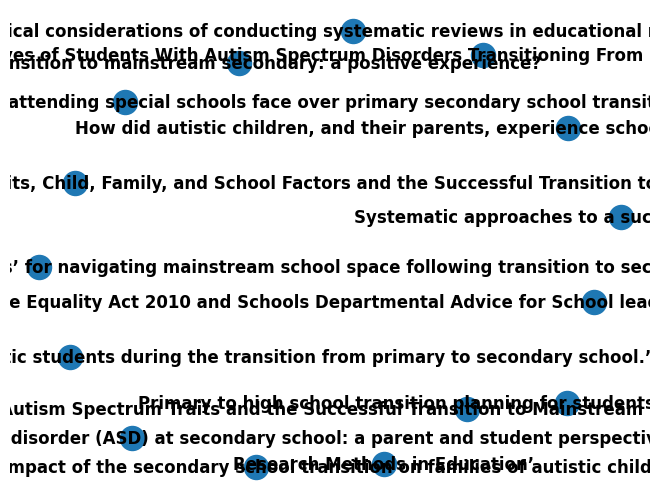

In [11]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

# Chainmap examples - https://realpython.com/python-chainmap/

>>> from collections import ChainMap
>>> from collections import OrderedDict, defaultdict

>>> # Use no arguments
>>> ChainMap()
ChainMap({})

>>> # Use regular dictionaries
>>> numbers = {"one": 1, "two": 2}
>>> letters = {"a": "A", "b": "B"}

>>> ChainMap(numbers, letters)
ChainMap({'one': 1, 'two': 2}, {'a': 'A', 'b': 'B'})

>>> ChainMap(numbers, {"a": "A", "b": "B"})
ChainMap({'one': 1, 'two': 2}, {'a': 'A', 'b': 'B'})

>>> # Use other mappings
>>> numbers = OrderedDict(one=1, two=2)
>>> letters = defaultdict(str, {"a": "A", "b": "B"})
>>> ChainMap(numbers, letters)
ChainMap(
    OrderedDict([('one', 1), ('two', 2)]),
    defaultdict(<class 'str'>, {'a': 'A', 'b': 'B'})
)

In [ ]:
import requests
import pandas as pd

# This search obtains paperId, title and matchscore fields
response = requests.get('https://api.semanticscholar.org/graph/v1/paper/search/match?query=What emotional-centred challenges do children attending special schools face over primary secondary school transition?')
data = response.json()

df = pd.json_normalize(data['data'])
df.head()

# Let's get the paper references for the first paper
response = requests.get('https://api.semanticscholar.org/graph/v1/paper/26d463146dfbcfa1e4e531eddc16ae6c74a5c45e/references?fields=contexts,intents,isInfluential,externalIds,year,abstract&offset=0&limit=100')
data = response.json()

list_of_references = pd.json_normalize(data['data'])
list_of_references.head()
#df.head()

,intents,isInfluential,contexts,citedPaper.paperId,citedPaper.externalIds.MAG,citedPaper.externalIds.DOI,citedPaper.externalIds.CorpusId,citedPaper.abstract,citedPaper.year,citedPaper.externalIds.PubMed,citedPaper.externalIds
0,[background],True,[…Wiley & Sons Ltd on behalf of National Assoc...,1824cc642de0971ca09fecb9f46309e66dc9eb0b,3120855306,10.1080/02643944.2020.1855669,234288080.0,"ABSTRACT Across countries, the age and timing ...",2021,NaN,NaN
1,[],False,[],91ea2904beaa46ab80ee8c63be663c85017b00e9,2921784536,10.1111/bjep.12273,76662055.0,BACKGROUND\nPrimary-secondary school transitio...,2020,30868577,NaN
2,[background],True,[See Bagnall (2020) for a full outline of limi...,d29ae903413f33bc272b16b20cdb46c12bac3b59,3002773696,10.1080/02643944.2020.1713870,213028364.0,ABSTRACT Transitions are an unavoidable part o...,2020,NaN,NaN
3,[background],True,"[Nonetheless, children with SEMH difficulties ...",fedaace877a9497cdd75bf0bac3967e366a66615,2921897712,10.1080/13632752.2019.1587899,150864549.0,ABSTRACT Young people whose behaviour does not...,2019,NaN,NaN
4,[background],True,"[, 2017), greater focus on the school environm...",0361b823a2bb198b5bc81080247c1baf6fcdad66,2909151624,10.1080/13632752.2018.1564498,149619409.0,ABSTRACT Transitions represent an important mi...,2019,NaN,NaN


# TODO:
work out what data fields I need from API

work out how to write loop that cycles through student paperId from essay reference list and gathers all other paperIds

## Sandbox
### Installing and testing libraries

### semanticscholar api



### Litstudy

In [ ]:
# Cell taken from litstudy man page
# Installed Python 3.9 env in addition to existing 3.13 install 
# and installed litstudy in the new environment
# This cell is to test that the new environment is working correctly
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [ ]:
#Load in the bibliographic data using litstudy function

docs_example = litstudy.load_ris_file(r'C:\Users\admin\OneDrive - DAML_DarrenGarside\Documents\Exported Items.ris')


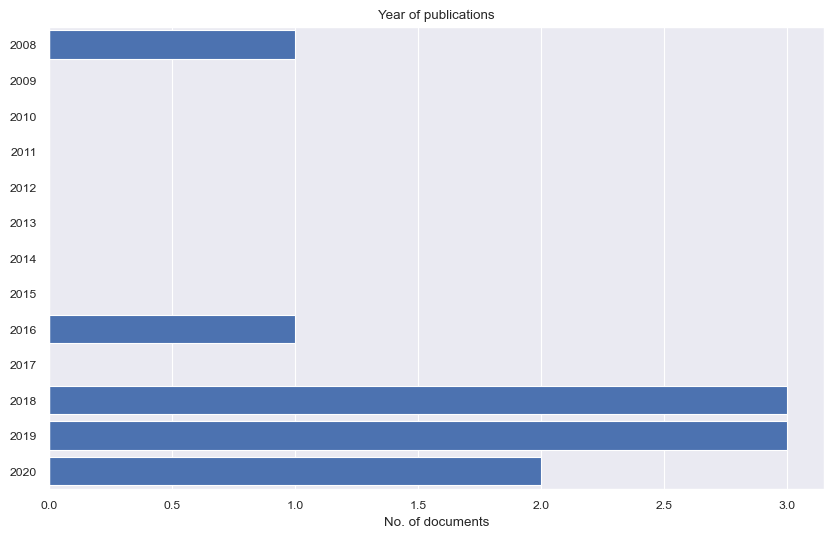

In [ ]:
# test the data has loaded by doing a very basic plot

litstudy.plot_year_histogram(docs_example);


### DOCX - no longer a candidate because of anystyle.io

### Beautiful Soup